#### CSML1020 Course Project - New Plant Diseases Dectection
#### Authors (Group 3): Paul Doucet, Jerry Khidaroo

#### Initilization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os

In [2]:
# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [3]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

#### Data Preparation

In [4]:
# List of all directories and file counts in given path
def getDirCounts(dirName):
    listOfFile = os.listdir(dirName)
    rows = []
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            fields = entry.split("___")
            if fields[1] == 'healthy':
                status = 'healthy'
            else:
                status = "unhealthy"
            
            disease = fields[1].split("_")[-1].replace(")","").lower()
            
            noOfFiles = sum([len(files) for r, d, files in os.walk(fullPath)])
            rows.append([fields[0], fields[1], noOfFiles, status, disease])

    df = pd.DataFrame(rows, columns=["plant", "condition", "count", "status", "disease"])
    #df['plant_status'] = df['plant'] + ' - ' + df['status']
    return df

In [5]:
dataDirTrain = '../NewPlantDiseasesDatasetSample/train'
dataDirValidate = '../NewPlantDiseasesDatasetSample/valid'
dataDirTest = '../NewPlantDiseasesDatasetSample/test'

In [6]:
# Get the list of all files in directory tree at given path
plants_df = getDirCounts(dataDirTrain)
plants_df

plant                             condition  count  \
0   Apple                    Apple_scab                            50      
1   Apple                    Black_rot                             50      
2   Apple                    Cedar_apple_rust                      50      
3   Apple                    healthy                               50      
4   Blueberry                healthy                               50      
5   Cherry_(including_sour)  healthy                               50      
6   Cherry_(including_sour)  Powdery_mildew                        50      
7   Corn_(maize)             Cercospora_leaf_spot_Gray_leaf_spot   50      
8   Corn_(maize)             Common_rust                           50      
9   Corn_(maize)             healthy                               50      
10  Corn_(maize)             Northern_Leaf_Blight                  50      
11  Grape                    Black_rot                             50      
12  Grape                    Esca_(Black_Measles)                  50      
13  Grape                    healthy                               50      
14  Grape                    Leaf_blight_(Isariopsis_Leaf_Spot)    50      
15  Orange                   Haunglongbing_(Citrus_greening)       50      
16  Peach                    Bacterial_spot                        50      
17  Peach                    healthy                               50      
18  Pepper,_bell             Bacterial_spot                        50      
19  Pepper,_bell             healthy                               50      
20  Potato                   Early_blight                          50      
21  Potato                   healthy                               50      
22  Potato                   Late_blight                           50      
23  Raspberry                healthy                               50      
24  Soybean                  healthy                               50      
25  Squash                   Powdery_mildew                        50      
26  Strawberry               healthy                               50      
27  Strawberry               Leaf_scorch                           50      
28  Tomato                   Bacterial_spot                        50      
29  Tomato                   Early_blight                          50      
30  Tomato                   healthy                               50      
31  Tomato                   Late_blight                           50      
32  Tomato                   Leaf_Mold                             50      
33  Tomato                   Septoria_leaf_spot                    50      
34  Tomato                   Spider_mites_Two-spotted_spider_mite  50      
35  Tomato                   Target_Spot                           50      
36  Tomato                   Tomato_mosaic_virus                   50      
37  Tomato                   Tomato_Yellow_Leaf_Curl_Virus         50      

       status   disease  
0   unhealthy  scab      
1   unhealthy  rot       
2   unhealthy  rust      
3   healthy    healthy   
4   healthy    healthy   
5   healthy    healthy   
6   unhealthy  mildew    
7   unhealthy  spot      
8   unhealthy  rust      
9   healthy    healthy   
10  unhealthy  blight    
11  unhealthy  rot       
12  unhealthy  measles   
13  healthy    healthy   
14  unhealthy  spot      
15  unhealthy  greening  
16  unhealthy  spot      
17  healthy    healthy   
18  unhealthy  spot      
19  healthy    healthy   
20  unhealthy  blight    
21  healthy    healthy   
22  unhealthy  blight    
23  healthy    healthy   
24  healthy    healthy   
25  unhealthy  mildew    
26  healthy    healthy   
27  unhealthy  scorch    
28  unhealthy  spot      
29  unhealthy  blight    
30  healthy    healthy   
31  unhealthy  blight    
32  unhealthy  mold      
33  unhealthy  spot      
34  unhealthy  mite      
35  unhealthy  spot      
36  unhealthy  virus     
37  unhealthy  virus

#### Data Exploration

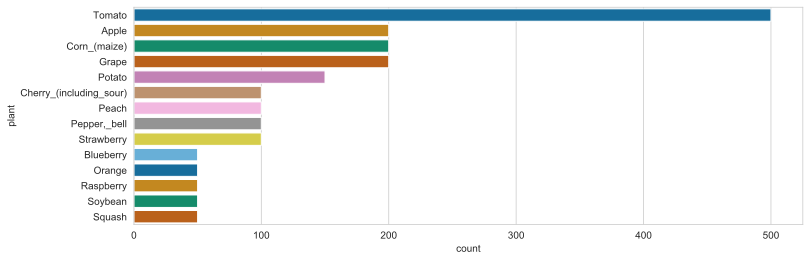

In [7]:
# number of images by plant
plant_images_sum_df = plants_df.groupby(by=['plant'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(12, 4), ncols=1, sharex=True)
sns.barplot(y='plant', x='count', data=plant_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", ax=ax1);

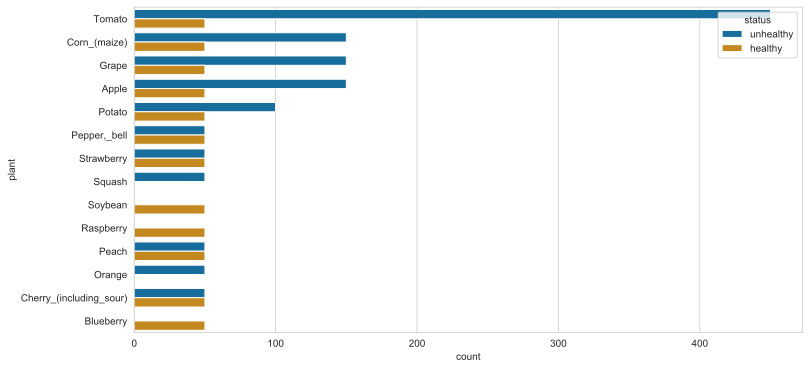

In [8]:
# number of images by plant (healthy and healthy)
plant_status_images_sum_df = plants_df.groupby(by=['plant','status'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(12, 6), ncols=1, sharex=True)
sns.barplot(y='plant', x='count', data=plant_status_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", hue='status', ax=ax1);

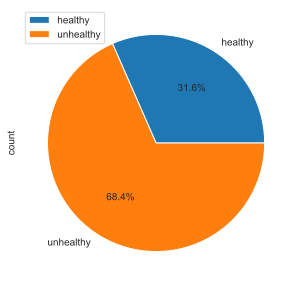

In [9]:
# Relative image percentages by health status
status_images_sum_df = plants_df.groupby(by=['status'], as_index=False)[plants_df.columns[:-2]].sum()
plot = status_images_sum_df.plot.pie(y='count', labels=status_images_sum_df['status'], autopct='%1.1f%%',  figsize=(5, 5))

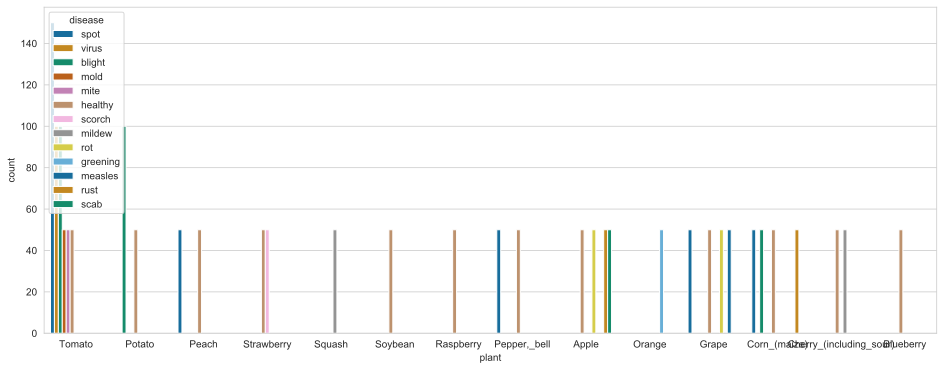

In [10]:
# number of images by plant per disease
plant_diseases_images_sum_df = plants_df.groupby(by=['plant','disease'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(16, 6), ncols=1, sharex=True)
sns.barplot(y='count', x='plant', data=plant_diseases_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", hue='disease', ax=ax1);

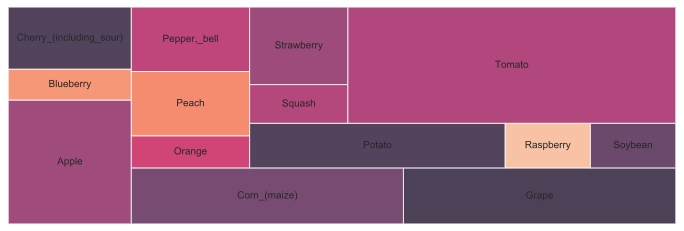

In [11]:
# Relative size visualization of images by plant
import squarify

fig, (ax1) = plt.subplots(figsize=(12, 4), ncols=1, sharex=True)
squarify.plot(sizes=plant_images_sum_df['count'], label=plant_images_sum_df['plant'], alpha=.8, ax=ax1)
plt.axis('off')
plt.show()

In [12]:
# Relative size visualization of images by plant disease
import plotly.express as px

plant_diseases_images_sum_df["plants"] = "plants" # in order to have a single root node
fig = px.treemap(plant_diseases_images_sum_df, path=['plants', 'plant', 'disease'], values='count',
                  color='disease', 
                  hover_data=['disease'],
                  range_color=[0.5, 8.5],
                  color_discrete_map={'(?)':'black', 'healthy':'lightgreen', 'blight':'darkblue', 'greening':'green', 'measles':'purple', 'mildew':'cyan', 'mite':'lightblue', 'mold':'pink', 'rot':'gold', 'rust':'darkred', 'scab':'darkgrey', 'scorch':'yellow', 'spot':'lightgray', 'virus':'red'},
                #   color_continuous_scale='RdBu_R',
                  width=1200, height=600
                  )

fig.show()

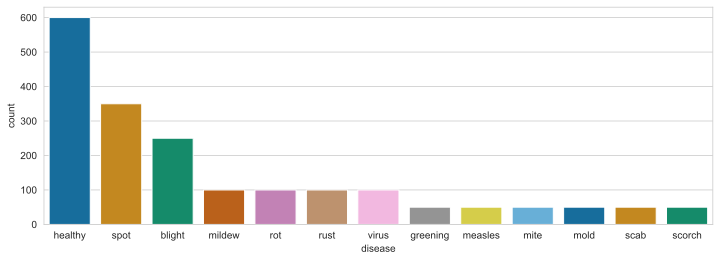

In [13]:
# number of images by disease
disease_images_sum_df = plants_df.groupby(by=['disease'], as_index=False)[plants_df.columns[:-2]].sum()
fig, (ax1) = plt.subplots(figsize=(12, 4), ncols=1, sharex=True)
sns.barplot(y='count', x='disease', data=disease_images_sum_df.sort_values(by='count', ascending=False), palette="colorblind", ax=ax1);

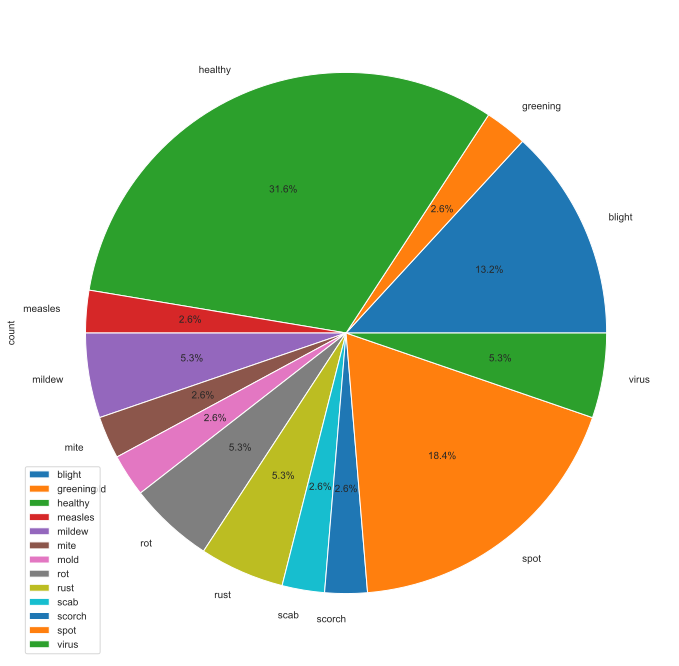

In [14]:
# Relative image percentages by disease
plot = disease_images_sum_df.plot.pie(y='count', labels=disease_images_sum_df['disease'], autopct='%1.1f%%',  figsize=(12, 12))

#### Data Preprocessing Visualizations

In [15]:
# Image Augmentation Fuction with one sample
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
#from matplotlib import pyplot

def modify_image(file_path, datagen):
    # load the image
    img = load_img(file_path)
    # convert to numpy array
    data = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    fig = plt.figure(figsize=(8, 8))
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        plt.grid(False)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        plt.imshow(image)
    # show the figure
    plt.show()

Using TensorFlow backend.


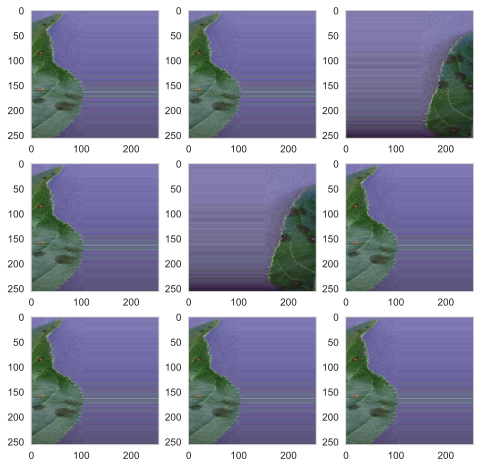

In [16]:
file_path = '../NewPlantDiseasesDatasetSample/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.jpg'
# image data augmentation generator - random horizontal shift
datagen = ImageDataGenerator(width_shift_range=[-150,150])
modify_image(file_path, datagen)

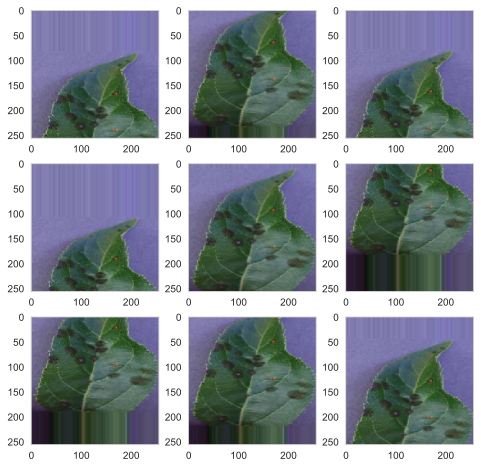

In [17]:
# image data augmentation generator - random vertical shift
datagen = ImageDataGenerator(height_shift_range=0.5)
modify_image(file_path, datagen)

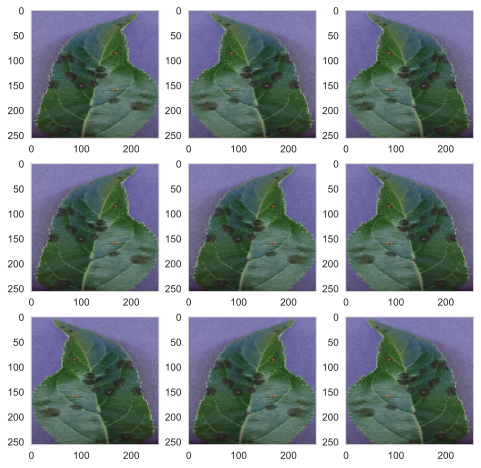

In [18]:
# image data augmentation generator - random horizontal flip
datagen = ImageDataGenerator(horizontal_flip=True)
modify_image(file_path, datagen)

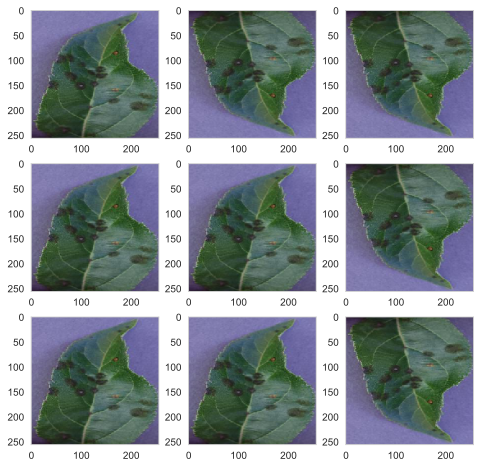

In [19]:
# image data augmentation generator - random vertical flip
datagen = ImageDataGenerator(vertical_flip=True)
modify_image(file_path, datagen)

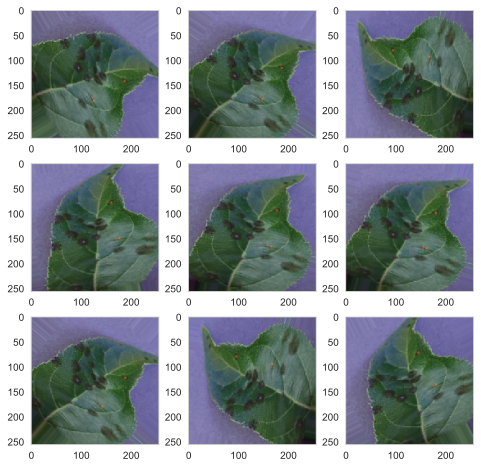

In [20]:
# image data augmentation generator - random rotation
datagen = ImageDataGenerator(rotation_range=90)
modify_image(file_path, datagen)

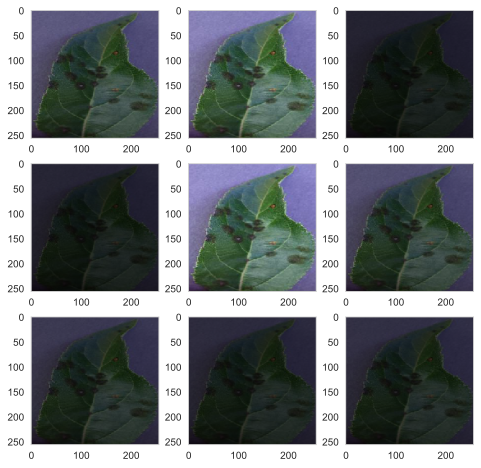

In [21]:
# image data augmentation generator - random brightness
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
modify_image(file_path, datagen)

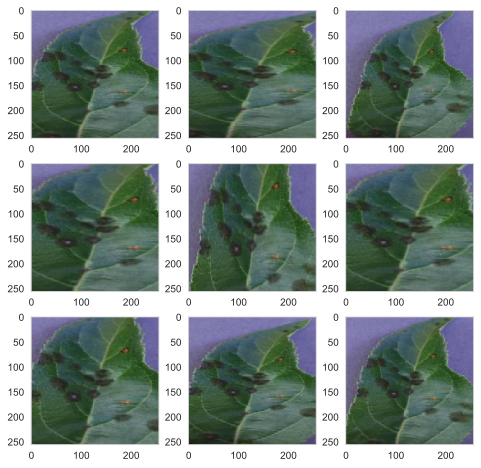

In [22]:
# image data augmentation generator - random zoom
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
modify_image(file_path, datagen)

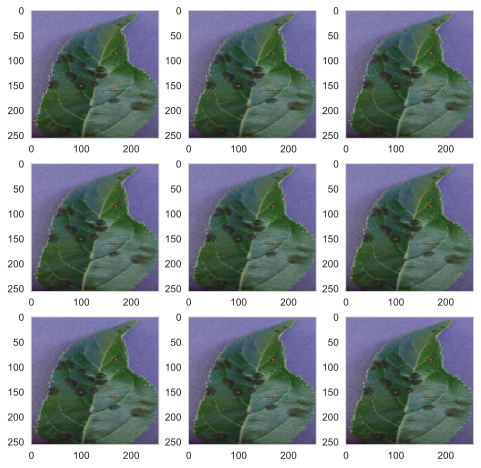

In [25]:
# image data augmentation generator - random zoom
datagen = ImageDataGenerator(shear_range=0.2)
modify_image(file_path, datagen)